In [1]:
import os;os.chdir('../')

import pyscissor
from netCDF4 import Dataset,num2date
import fiona, numpy as np
import pylab as pl
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
from shapely.geometry import shape

from datetime import datetime as dt

%config InlineBackend.figure_format = 'svg'
import imp

In [2]:
# read shapefile and netcdf file
ncf= Dataset('data/sample_2.nc','r')
sf = fiona.open('zip://data/shape_esri.zip','r') # ESRI shapefile can be used to

In [3]:
lats =ncf.variables['lat'][:]
lons =ncf.variables['lon'][:]
temp =ncf.variables['tmin'][:]
times=num2date(ncf.variables['time'][:],ncf.variables['time'].units)[:]
times_py=[dt(x.year,x.month,x.day,x.hour,x.minute) for x in times]

In [4]:
# shifted mesh for plotting with pcolormesh
def shifted_mesh(lons,lats):
    lats_diff = np.diff(lats,n=1)/2
    lats_s = lats-np.array([*lats_diff,lats_diff[-1]])
    lons_diff = np.diff(lons,n=1)/2
    lons_s = lons-np.array([*lons_diff,lons_diff[-1]])

    return np.meshgrid(lons_s,lats_s)
    

In [5]:
record = next(iter(sf))
shapely_shape = shape(record['geometry'])
pys = pyscissor.scissor(shapely_shape,lats,lons)
wg = pys.get_masked_weight()

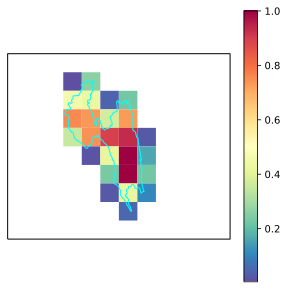

In [6]:
# cartopy feature
cart_ft = ShapelyFeature([shapely_shape],ccrs.PlateCarree(),facecolor='none',edgecolor='cyan',linewidth=1)


# shifted mesh
x,y=shifted_mesh(lons,lats)

# plot
fig =pl.figure(figsize=(5,5))
ax=pl.axes(projection=ccrs.PlateCarree())

pl.pcolormesh(x,y,wg,cmap='Spectral_r')
pl.colorbar()
ax.add_feature(cart_ft)
ax.set_xlim(89,95)
ax.set_ylim(20,25)
pl.show()